In [1]:
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('/Users/yoavhaim/Desktop/Programming/Project/Data-Final/ma20.csv')

columns=df.columns
columns

Index(['Player', 'Date', 'Team', 'Against', 'Home', 'MP', 'FG', 'FGA', 'FG%',
       '3P',
       ...
       'PTS20_MA', 'AST20_MA', 'STL20_MA', 'BLK20_MA', 'DD20_MA', 'DT20_MA',
       'MP20_MA', 'FGA20_MA', 'TS%20_MA', '+/-20_MA'],
      dtype='object', length=461)

In [2]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=df.drop(['Player','Date', 'Team', 'Against', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST','STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-', 'GameLink', 'TS%', 'DD', 'DT','Season'], axis=1)

In [4]:

columns=df.columns
columns

Index(['Home', 'FPTS', 'D_R', 'FPTS_1', 'FPTS_2', 'FPTS_3', 'FPTS_4', 'FPTS_5',
       'FPTS_6', 'FPTS_7',
       ...
       'PTS20_MA', 'AST20_MA', 'STL20_MA', 'BLK20_MA', 'DD20_MA', 'DT20_MA',
       'MP20_MA', 'FGA20_MA', 'TS%20_MA', '+/-20_MA'],
      dtype='object', length=432)

In [5]:
df.describe()

,Home,FPTS,D_R,FPTS_1,FPTS_2,FPTS_3,FPTS_4,FPTS_5,FPTS_6,FPTS_7,...,PTS20_MA,AST20_MA,STL20_MA,BLK20_MA,DD20_MA,DT20_MA,MP20_MA,FGA20_MA,TS%20_MA,+/-20_MA
count,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,...,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000
mean,0.516078,36.027936,110.363124,36.111460,36.252223,36.165564,36.214823,36.242360,36.223717,36.112885,...,19.418664,4.168961,1.006601,0.501470,0.346478,0.020873,31.490727,14.595859,186.406154,1.185033
std,0.499798,14.446930,2.896010,14.444457,14.373862,14.390632,14.363183,14.369753,14.403654,14.349116,...,5.915619,2.335689,0.410268,0.456464,0.292037,0.072267,3.881058,4.133127,105.068093,4.505197
min,0.000000,2.500000,102.500000,2.500000,2.250000,2.250000,2.250000,2.500000,1.750000,1.750000,...,6.368421,0.473684,0.157895,0.000000,0.000000,0.000000,15.545789,4.578947,20.762105,-13.000000
25%,0.000000,25.500000,108.400000,25.750000,25.750000,25.750000,25.750000,25.750000,25.750000,25.750000,...,14.947368,2.210526,0.736842,0.210526,0.153846,0.000000,29.001579,11.578947,106.884211,-1.736842
50%,1.000000,34.750000,110.400000,34.750000,35.000000,34.750000,34.750000,34.750000,34.750000,34.750000,...,18.736842,3.736842,0.947368,0.368421,0.256410,0.000000,32.200000,14.368421,163.242105,1.157895
75%,1.000000,45.500000,112.400000,45.500000,45.500000,45.500000,45.500000,45.500000,45.500000,45.250000,...,23.368421,5.684211,1.210526,0.631579,0.461538,0.000000,34.437368,17.736842,249.396842,4.421053
max,1.000000,96.750000,117.800000,96.750000,96.750000,96.750000,96.750000,96.750000,96.750000,96.750000,...,42.105263,12.736842,2.684211,3.210526,1.897436,0.684211,39.470000,28.157895,725.224211,14.684211


In [6]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['FPTS'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('FPTS', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [7]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [8]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3288, 431)
Training Labels Shape: (3288,)
Testing Features Shape: (1097, 431)
Testing Labels Shape: (1097,)


In [9]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('FPTS2_MA')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  11.19


# Train the Model

In [10]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Make Predictions on the Test Set


In [11]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'FPTS')


Mean Absolute Error: 8.51 FPTS


# Determine Performance Metrics


In [12]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 68.72 %.


# Interpret Model and Report Results


In [14]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

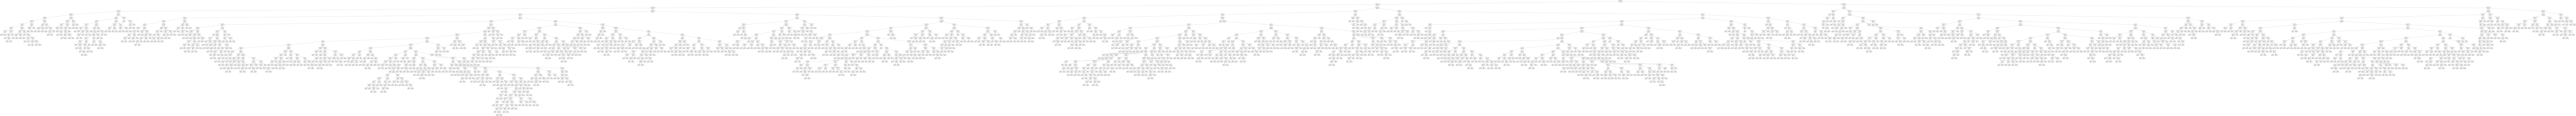

In [16]:
from IPython.display import Image
Image('tree.png')

In [17]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

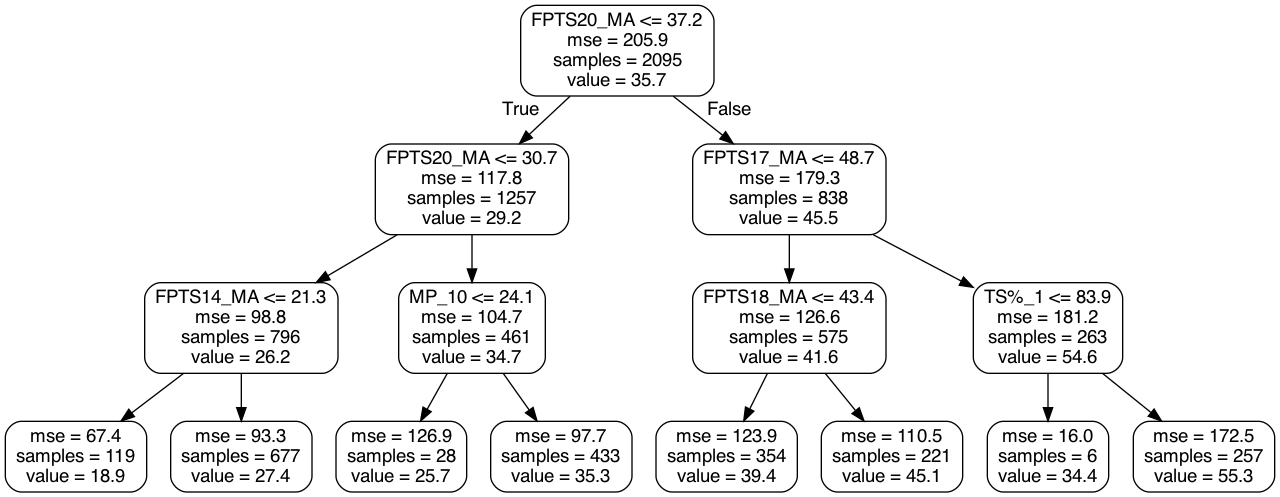

In [18]:
from IPython.display import Image
Image('small_tree.png')

In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FPTS20_MA            Importance: 0.15
Variable: FPTS17_MA            Importance: 0.07
Variable: FPTS15_MA            Importance: 0.05
Variable: FPTS9_MA             Importance: 0.04
Variable: FPTS10_MA            Importance: 0.03
Variable: FPTS14_MA            Importance: 0.03
Variable: FPTS16_MA            Importance: 0.03
Variable: FPTS18_MA            Importance: 0.03
Variable: FPTS19_MA            Importance: 0.02
Variable: D_R                  Importance: 0.01
Variable: +/-_19               Importance: 0.01
Variable: FPTS8_MA             Importance: 0.01
Variable: FPTS11_MA            Importance: 0.01
Variable: FPTS12_MA            Importance: 0.01
Variable: FPTS13_MA            Importance: 0.01
Variable: Home                 Importance: 0.0
Variable: FPTS_1               Importance: 0.0
Variable: FPTS_2               Importance: 0.0
Variable: FPTS_3               Importance: 0.0
Variable: FPTS_4               Importance: 0.0
Variable: FPTS_5               Importance: 0.

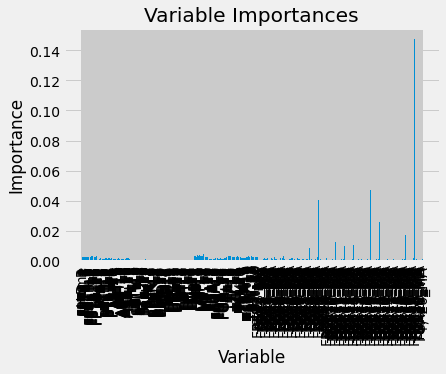

In [20]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Model 2:

In [43]:
x_baseline = df['FPTS20_MA'].values.reshape(-1, 1)
y_baseline = df['FPTS']

In [44]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x_baseline, y_baseline, cv=4)
avg_R_squared = scores.mean()
print(scores)
avg_R_squared

[0.40305699 0.47874995 0.45213252 0.45344679]


0.4468465620019664

In [45]:
from sklearn.linear_model import Lasso

Lasso = Lasso()

scores = cross_val_score(Lasso, x_baseline, y_baseline, cv=4)
avg_R_squared = scores.mean()
print(scores)
avg_R_squared

[0.40317323 0.47869114 0.45201467 0.45320668]


0.44677142722350693

In [46]:
from sklearn.ensemble import RandomForestRegressor

for i in [3, 4, 5, 6,10]:
    ran_forrest = RandomForestRegressor(max_depth=i)
    scores = cross_val_score(ran_forrest, x_baseline, y_baseline, cv=4)
    print("Scores depth", i, ':', scores)
    avg_R_squared = scores.mean()
    print(avg_R_squared)

Scores depth 3 : [0.40731749 0.47260981 0.45142625 0.45661285]
0.4469916025823162
Scores depth 4 : [0.40592962 0.46766447 0.43682369 0.45455031]
0.4412420221033655
Scores depth 5 : [0.40368004 0.46662192 0.43092905 0.45296341]
0.43854860588149835
Scores depth 6 : [0.39687904 0.45568587 0.42441301 0.44226059]
0.4298096284850219
Scores depth 10 : [0.35414753 0.40468297 0.38942894 0.39909086]
0.3868375751325698
